In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm


from sklearn import preprocessing
from sklearn import utils
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from pprint import pprint

from sklearn.model_selection import cross_val_score

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import MinMaxScaler

In [3]:
df = pd.read_csv('Classifier_inputs.csv')
df.head(1)

,Unnamed: 0,loc_desc,Arrest,Domestic,Beat,District,Ward,area,FBI,Year,Longitude,Latitude
0,0,17,1,1,1022,10.0,24.0,29.0,10,2016,-87.706819,41.864073


In [4]:
df_output = pd.read_csv('targets.csv')
df_output.head(1)

,Unnamed: 0,Primary Type
0,0,BATTERY


In [5]:
new_df = df.merge(df_output, on='Unnamed: 0', how='left')
new_df.head()

,Unnamed: 0,loc_desc,Arrest,Domestic,Beat,District,Ward,area,FBI,Year,Longitude,Latitude,Primary Type
0,0,17,1,1,1022,10.0,24.0,29.0,10,2016,-87.706819,41.864073,BATTERY
1,1,109,0,1,313,3.0,20.0,42.0,10,2016,-87.604363,41.782922,BATTERY
2,2,125,0,0,1524,15.0,37.0,25.0,24,2016,-87.758372,41.894908,PUBLIC PEACE VIOLATION
3,3,121,0,0,1532,15.0,28.0,25.0,10,2016,-87.749516,41.885687,BATTERY
4,4,109,0,1,1523,15.0,28.0,25.0,7,2016,-87.761751,41.886297,THEFT


In [23]:
le = LabelEncoder()
le.fit(new_df['Primary Type'])
new_df['Primary Type'] = le.transform(new_df['Primary Type'])
new_df.head()

,Unnamed: 0,loc_desc,Arrest,Domestic,Beat,District,Ward,area,FBI,Year,Longitude,Latitude,Primary Type
0,0,17,1,1,1022,10.0,24.0,29.0,10,2016,-87.706819,41.864073,2
1,1,109,0,1,313,3.0,20.0,42.0,10,2016,-87.604363,41.782922,2
2,2,125,0,0,1524,15.0,37.0,25.0,24,2016,-87.758372,41.894908,27
3,3,121,0,0,1532,15.0,28.0,25.0,10,2016,-87.749516,41.885687,2
4,4,109,0,1,1523,15.0,28.0,25.0,7,2016,-87.761751,41.886297,31


In [26]:
scaler = MinMaxScaler()
scaler.fit(new_df['Longitude'].values.reshape(-1,1))
new_df['Longitude'] = scaler.transform(new_df['Longitude'].values.reshape(-1,1))

In [27]:
scaler = MinMaxScaler()
scaler.fit(new_df['Latitude'].values.reshape(-1,1))
new_df['Latitude'] = scaler.transform(new_df['Latitude'].values.reshape(-1,1))

In [30]:
X = df.drop(['Arrest','Unnamed: 0','Year'], axis = 1)
y = df['Arrest']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)
model = RandomForestClassifier(n_estimators=15)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8543325482940071

In [12]:
k_fold_summary = []
model = RandomForestClassifier(n_estimators = 20, random_state = 0)
scores = cross_val_score(model, X=X, y=y, cv=5, n_jobs=6)
# k_fold_summary.append((scores.mean()))
print(scores.mean())

0.8499868108325892


In [32]:
predictions = model.predict(X_test)

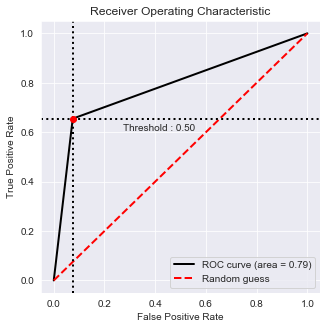

In [33]:
from plot_metric.functions import BinaryClassification
bc = BinaryClassification(y_test, predictions, labels=["0", "1"])

# Figures
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.show()

In [36]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90    314271
           1       0.76      0.65      0.70    111610

    accuracy                           0.85    425881
   macro avg       0.82      0.79      0.80    425881
weighted avg       0.85      0.85      0.85    425881

